# ISO-3 codes of EU countries

In [5]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path
import os
import copy

# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

# Selecting borders for EU countries

In [3]:
input_dir = Path.cwd() / ".." / "input_data"
eu_countries = pd.read_excel(f"{input_dir}/Country_Codes_and_Names.xlsx", sheet_name="Sheet2")
eu_country_list = eu_countries["COUNTRY NAME"]

In [6]:
# Import subregion borders in gpd format, make sure the directory is correct
subregion_borders = gpd.read_file(f"{input_dir}/WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp").set_index("ISO3")

In [12]:
# Subset the gpd with country borders to EU borders
eu_borders = subregion_borders[subregion_borders["NAME"].isin(eu_country_list)]

# Getting the ISO3 for EU countries
eu_iso = eu_borders.index

# Add the ISO3 to eu_countries excel file
eu_countries["ISO3"] = eu_iso

<Axes: >

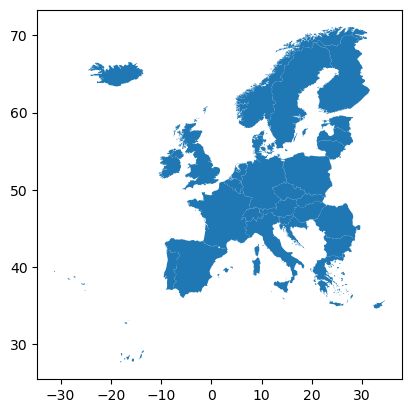

In [9]:
eu_borders.plot()

In [14]:
# Export the modified eu_countries to csv
eu_countries.to_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")